# Plant Disease Prediction

## Importing libraries

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [52]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1281 files belonging to 25 classes.


### Validation Image Preprocessing

In [53]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1281 files belonging to 25 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [54]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [56]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [58]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [59]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [60]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [61]:
cnn.add(tf.keras.layers.Flatten())

In [62]:
cnn.add(tf.keras.layers.Dense(units=2000,activation='relu'))

unit means number of Neural

In [63]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [64]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=25,activation='softmax'))

Change the unit size according to your data set size

### Compiling and Training Phase

In [65]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2000)           │     4,098,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │        50,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,860,249 (33.80 MB)

 Trainable params: 8,860,249 (33.80 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 22s 479ms/step - accuracy: 0.0386 - loss: 4.2839 - val_accuracy: 0.0422 - val_loss: 3.2189
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 467ms/step - accuracy: 0.0326 - loss: 3.2193 - val_accuracy: 0.0390 - val_loss: 3.2166
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0437 - loss: 3.2186 - val_accuracy: 0.0749 - val_loss: 3.1448
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - accuracy: 0.0640 - loss: 3.1353 - val_accuracy: 0.0781 - val_loss: 3.1333
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 459ms/step - accuracy: 0.0474 - loss: 3.2132 - val_accuracy: 0.0390 - val_loss: 3.2583
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 460ms/step - accuracy: 0.0289 - loss: 3.2481 - val_accuracy: 0.0422 - val_loss: 3.2174
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - accuracy: 0.0595 - loss: 3.1677 - val_accuracy: 0.0788 - val_loss: 3.0941
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 483ms/step - accuracy: 0.0794 - loss: 3.0884 - val_accurac

## Evaluating Model

In [68]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.0851 - loss: 3.0797
Training accuracy: 0.08977361768484116


In [69]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.0938 - loss: 3.0826
Validation accuracy: 0.08977361768484116


### Saving Model

In [70]:
cnn.save('trained_plant_disease_model.keras')

In [71]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03747072443366051,
  0.035909444093704224,
  0.04683840647339821,
  0.07103825360536575,
  0.0476190485060215,
  0.036690086126327515,
  0.07181888818740845,
  0.08274785429239273,
  0.06947696954011917,
  0.07416081428527832],
 'loss': [3.5554680824279785,
  3.220078706741333,
  3.197995662689209,
  3.1621618270874023,
  3.228914976119995,
  3.229327917098999,
  3.128575086593628,
  3.0681779384613037,
  3.1675350666046143,
  3.108480930328369],
 'val_accuracy': [0.04215456545352936,
  0.03903200477361679,
  0.07494144886732101,
  0.07806400954723358,
  0.03903200477361679,
  0.04215456545352936,
  0.07884465157985687,
  0.08665105700492859,
  0.07962529361248016,
  0.08977361768484116],
 'val_loss': [3.2188501358032227,
  3.216555118560791,
  3.1447649002075195,
  3.1333491802215576,
  3.2582993507385254,
  3.2174112796783447,
  3.0941104888916016,
  3.0299124717712402,
  3.0447120666503906,
  3.0728979110717773]}

In [72]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [73]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

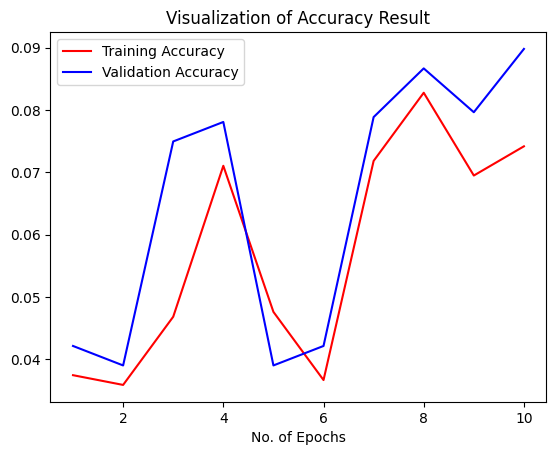

In [74]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [75]:
class_name = validation_set.class_names

In [76]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1281 files belonging to 25 classes.


In [77]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1281/1281 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step


In [78]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [79]:
Y_true

<tf.Tensor: shape=(1281,), dtype=int64, numpy=array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64)>

In [80]:
predicted_categories

<tf.Tensor: shape=(1281,), dtype=int64, numpy=array([3, 4, 3, ..., 3, 3, 3], dtype=int64)>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [82]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00        54
                                 Apple___Black_rot       0.00      0.00      0.00        50
                          Apple___Cedar_apple_rust       0.19      0.16      0.17        50
                                   Apple___healthy       0.05      1.00      0.09        54
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.15      0.04      0.06        53
                       Corn_(maize)___Common_rust_       1.00      0.78      0.88        51
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.00        50
                            Corn_(maize)___healthy       0.00      0.00      0.00        46
                                 Grape___Black_rot       0.00      0.00      0.00        51
                      Grape___Esca_(Black_Measles)       0.00      0.00      0.

c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Confusion Matrix Visualization

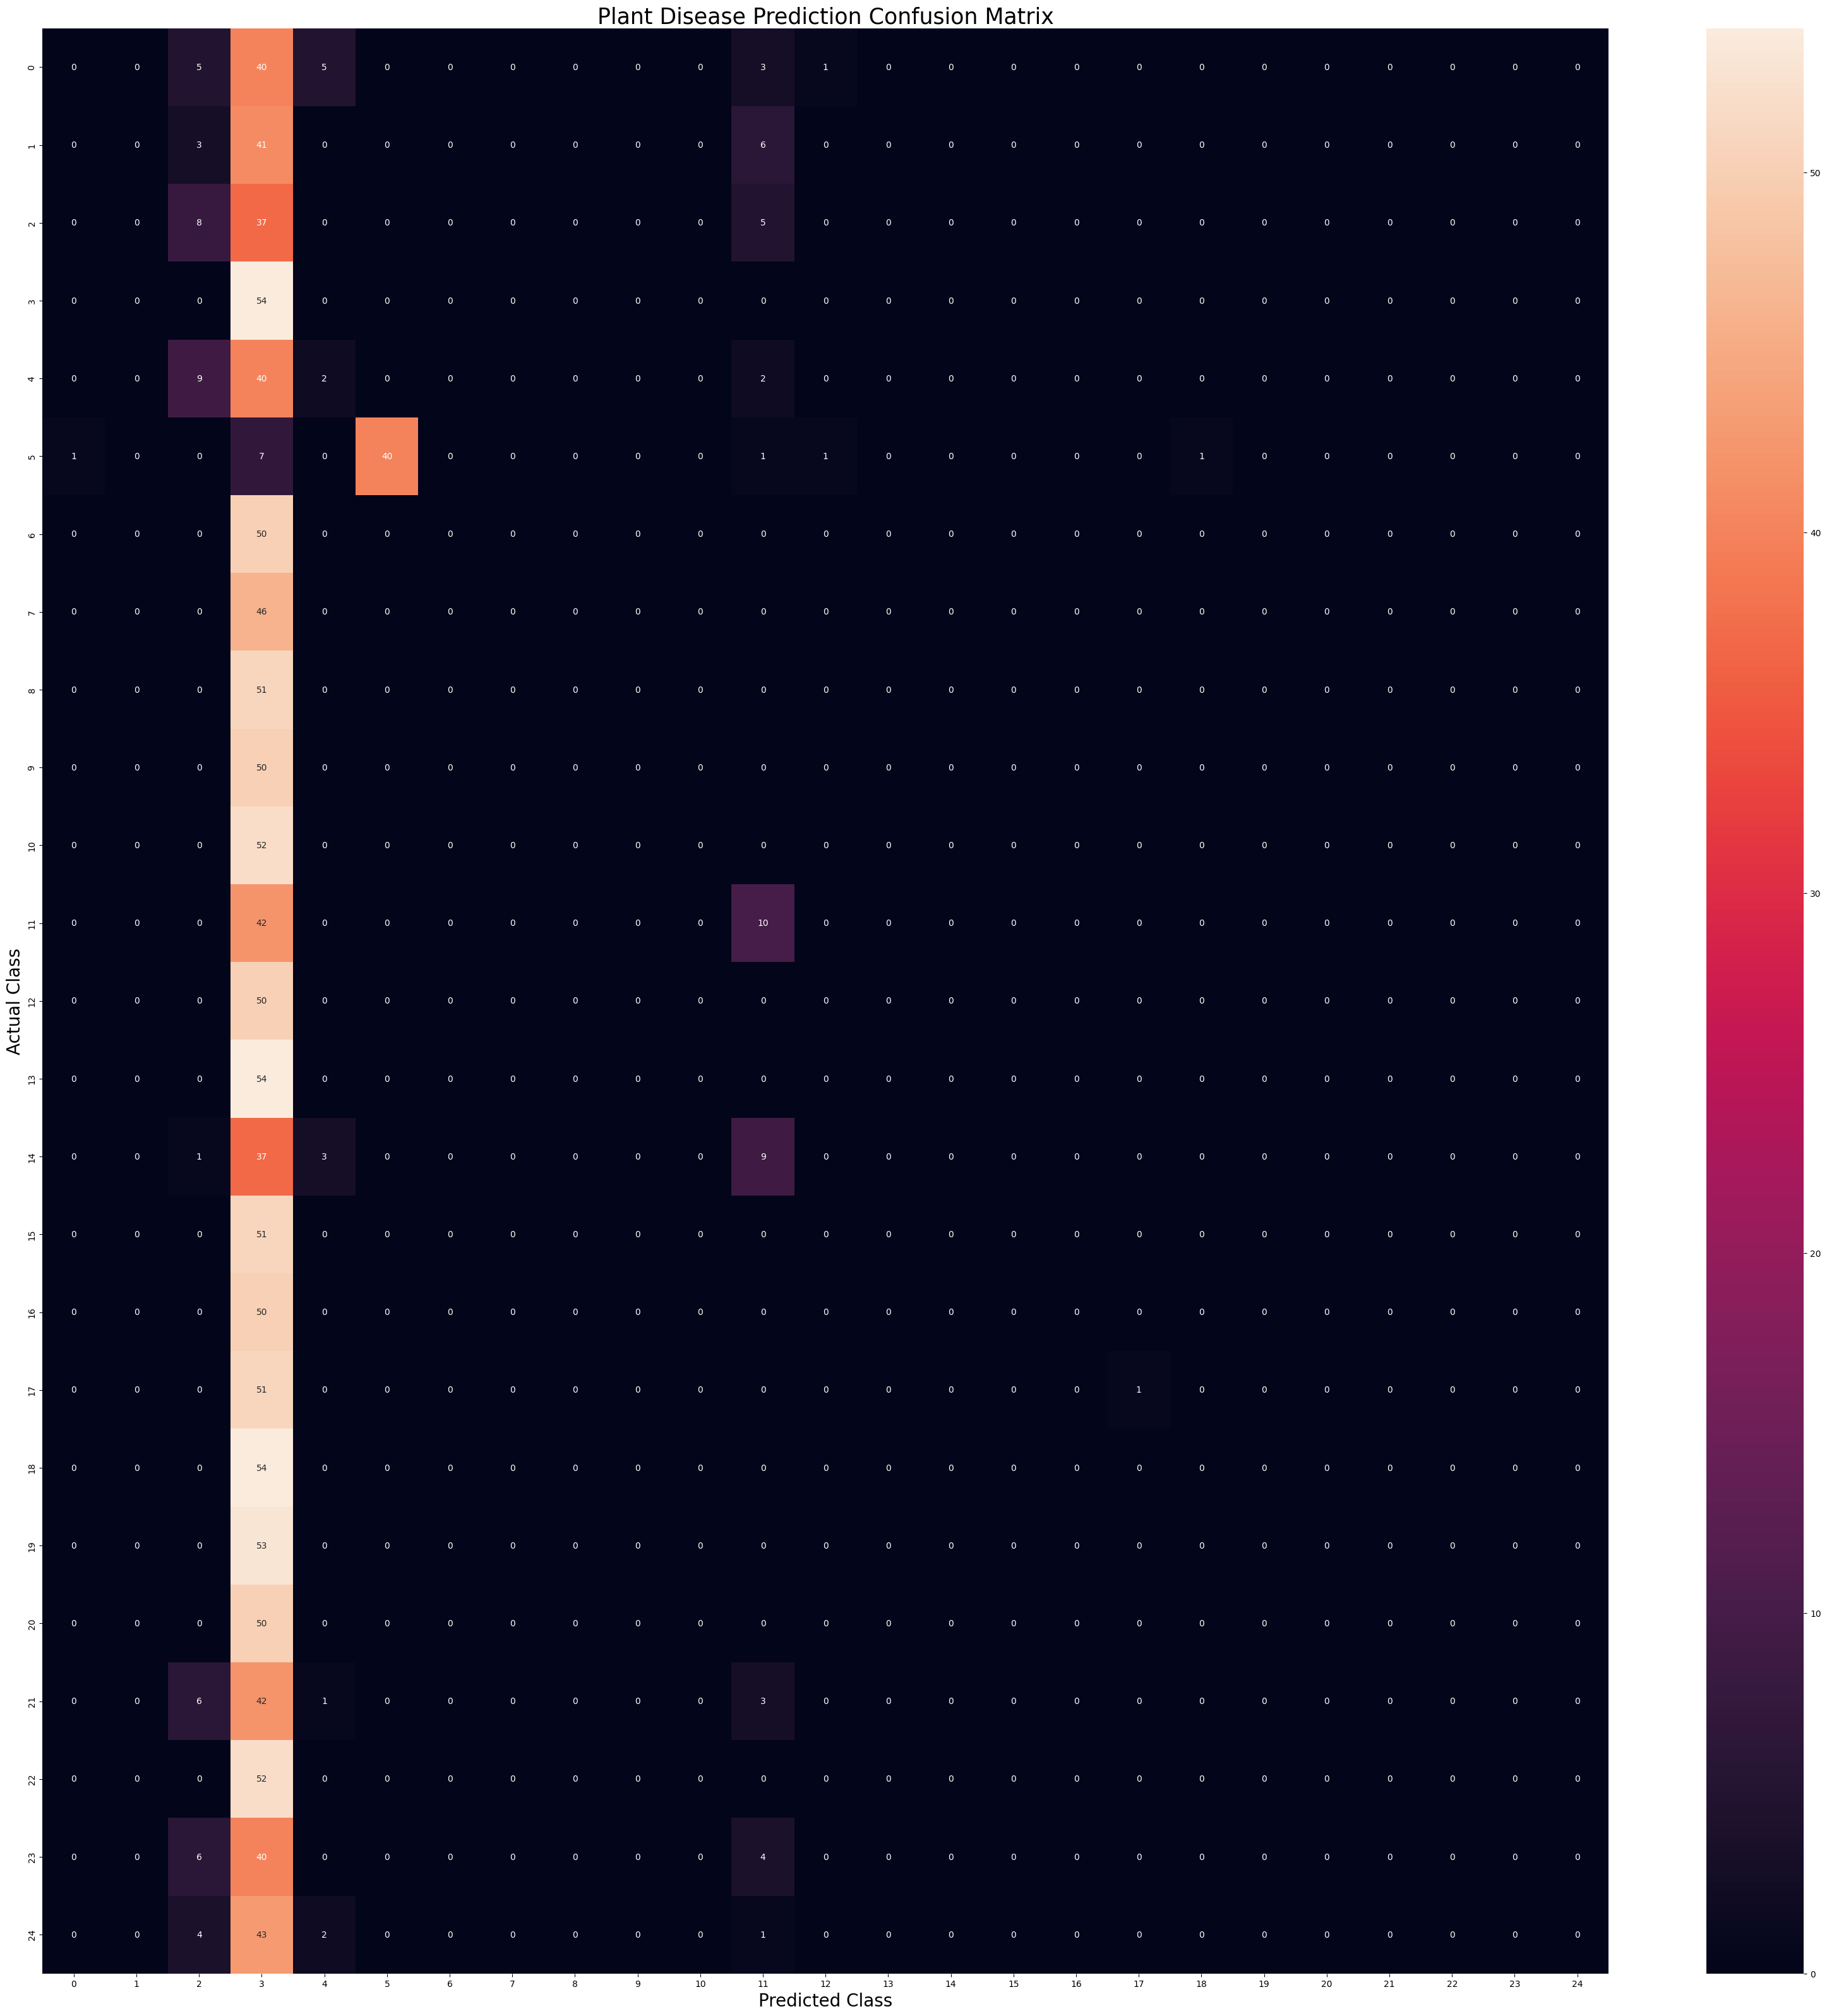

In [83]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()